In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training8.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.006206,0.006724,0.874061,0.000724,0.000517,0.207189,0.207189,0.020274,0.073028,0.0,...,0.000103,0,0.000000,0.0,0.0,0.0,0.000103,0.0,0,208500
1,0.001873,0.007492,0.899023,0.000562,0.000749,0.185049,0.185049,0.000000,0.091588,0.0,...,0.000094,0,0.000000,0.0,0.0,0.0,0.000094,0.0,0,181500
2,0.004914,0.005569,0.921408,0.000573,0.000410,0.163888,0.163970,0.013268,0.039805,0.0,...,0.000082,0,0.000000,0.0,0.0,0.0,0.000082,0.0,0,223500
3,0.006596,0.005654,0.899887,0.000660,0.000471,0.180449,0.185631,0.000000,0.020353,0.0,...,0.000094,0,0.000094,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.003961,0.005545,0.941326,0.000528,0.000330,0.132023,0.132023,0.023104,0.043238,0.0,...,0.000066,0,0.000000,0.0,0.0,0.0,0.000066,0.0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.187647,-0.150612,0.228492,0.030433,-0.394900,-0.393929,-0.401973,0.286089,0.209935,-0.056868,...,-0.423426,NaN,-0.139545,-0.051458,-0.030231,-0.049619,-0.338044,0.273673,NaN,1.000000
BsmtQual_Ex,-0.019162,0.029625,-0.004661,0.153260,-0.114671,-0.048726,-0.053646,0.226263,0.196354,-0.036025,...,-0.206695,NaN,-0.045265,-0.014686,-0.024430,-0.031567,-0.170257,0.307506,NaN,0.451608
KitchenQual_Ex,-0.008671,-0.015889,-0.001595,0.123222,-0.057121,-0.059439,-0.059953,0.120338,0.146168,-0.038462,...,-0.133922,NaN,0.049378,-0.013164,-0.021899,-0.028297,-0.165153,0.190471,NaN,0.409421
ExterQual_Ex,-0.043465,-0.002081,0.037454,0.084736,-0.084612,-0.086550,-0.088374,0.216657,0.111300,-0.034108,...,-0.192771,NaN,-0.046799,-0.009523,-0.015841,-0.020469,-0.160383,0.240313,NaN,0.404878
Neighborhood_NridgHt,0.079830,0.011417,-0.060334,0.180990,-0.053661,0.014349,0.010042,0.207970,0.098621,-0.051179,...,-0.091817,NaN,-0.056647,-0.011527,-0.019174,-0.024776,-0.048898,0.173688,NaN,0.313647
ExterQual_Gd,0.244144,0.127291,-0.271118,0.500648,0.062334,0.222969,0.213852,0.138024,0.093554,-0.080887,...,0.020290,NaN,-0.045175,-0.033648,-0.050994,-0.038926,0.054771,0.242718,NaN,0.307234
Foundation_PConc,0.294030,0.138138,-0.309576,0.539514,0.079992,0.286325,0.275757,0.187246,0.134822,-0.131092,...,0.067493,NaN,-0.068619,0.020954,-0.042032,-0.034403,0.078990,0.286249,NaN,0.306703
Fireplaces,0.063250,0.047981,-0.071323,0.203926,-0.014197,0.007862,0.003995,0.146287,0.132208,-0.002821,...,-0.008842,NaN,-0.092457,-0.046835,-0.022880,-0.004424,0.044421,0.036288,NaN,0.296400
Neighborhood_NoRidge,-0.053253,0.002040,0.061684,-0.005377,-0.120317,-0.107713,-0.110160,0.197925,0.082584,-0.044654,...,-0.039500,NaN,-0.001196,-0.008586,-0.014284,-0.018456,-0.044507,-0.047499,NaN,0.292830
MasVnrArea,0.226652,0.020592,-0.232376,0.282195,0.032106,0.138909,0.130019,1.000000,0.209548,-0.087016,...,0.046362,NaN,-0.007775,-0.012815,0.015781,0.050269,0.038061,0.075631,NaN,0.286089


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=GradientBoostingRegressor()

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'ExterQual_Ex',
       'Neighborhood_NridgHt', 'ExterQual_Gd', 'Foundation_PConc',
       'Fireplaces', 'Neighborhood_NoRidge', 'MasVnrArea'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,29597.259897,40532.164816,0.785817
1,11,29228.657043,40870.861512,0.782222
2,12,28653.966652,40147.819319,0.789859
3,13,28600.422467,39799.273788,0.793492
4,14,28657.498257,39809.538915,0.793386
...,...,...,...,...
105,115,22224.628908,32044.960489,0.866123
106,116,22260.049029,32108.124981,0.865595
107,117,22258.878053,32213.224431,0.864713
108,118,22380.703748,32453.513796,0.862688


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
48,58,21416.217420,31109.431474,0.873826
59,69,21486.773789,30851.717264,0.875908
46,56,21489.173401,31136.545985,0.873606
15,25,21499.300430,30589.594799,0.878007
49,59,21509.600140,31138.569862,0.873589
...,...,...,...,...
3,13,28600.422467,39799.273788,0.793492
2,12,28653.966652,40147.819319,0.789859
4,14,28657.498257,39809.538915,0.793386
1,11,29228.657043,40870.861512,0.782222


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


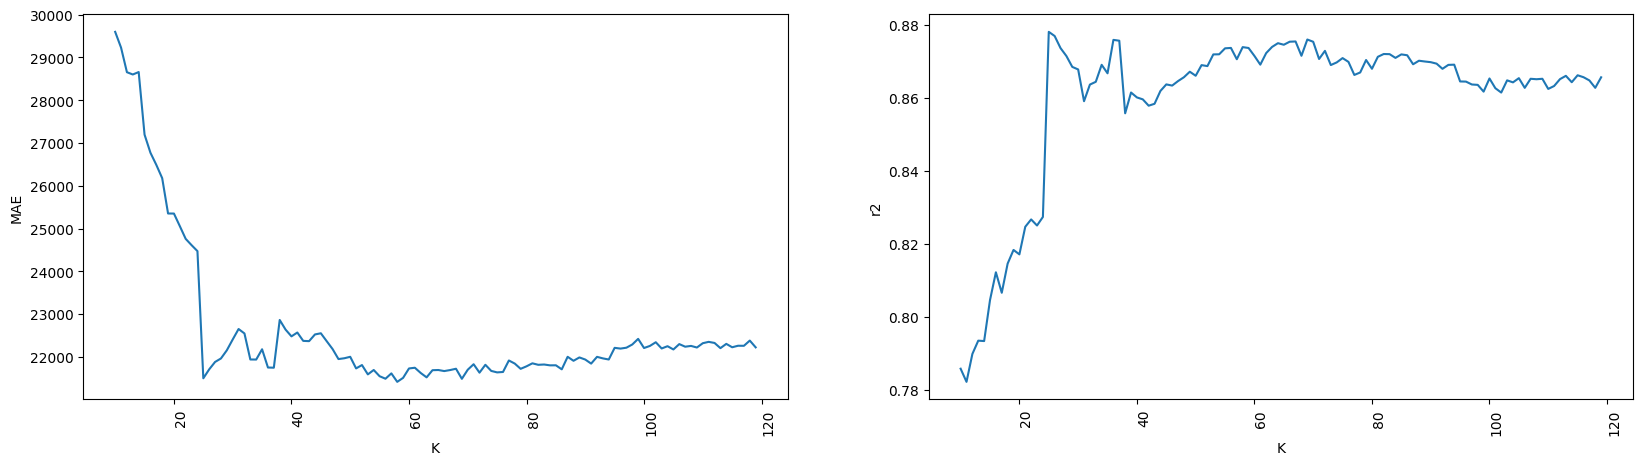

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               5.410654e-05
LotFrontage              3.361824e-06
LotArea                  1.328717e-02
OverallQual              5.280132e-08
OverallCond              5.329786e-08
                             ...     
SaleCondition_Family     1.484516e-10
SaleCondition_Normal     2.527637e-09
SaleCondition_Partial    7.462514e-10
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,27945.033502,43852.044028,0.749293
1,101,28141.074645,43704.012635,0.750983
2,102,28106.537354,44011.664579,0.747465
3,103,28123.859207,44096.654548,0.746489
4,104,27820.973714,43663.828826,0.751441
...,...,...,...,...
395,495,32667.126622,50264.756082,0.670608
396,496,32652.165670,50140.450171,0.672235
397,497,32765.425831,51115.152839,0.659368
398,498,32743.537136,50921.259961,0.661947


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
68,168,27474.500721,41865.972938,0.771488
70,170,27499.891574,41520.850591,0.775240
69,169,27532.567816,41818.355540,0.772008
42,142,27581.518988,43005.936437,0.758875
67,167,27616.768074,41659.521170,0.773736
...,...,...,...,...
331,431,33382.012569,53366.657117,0.628699
205,305,33402.629761,53520.981717,0.626548
232,332,33402.916421,53302.713137,0.629588
246,346,33409.376532,53563.766403,0.625951


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


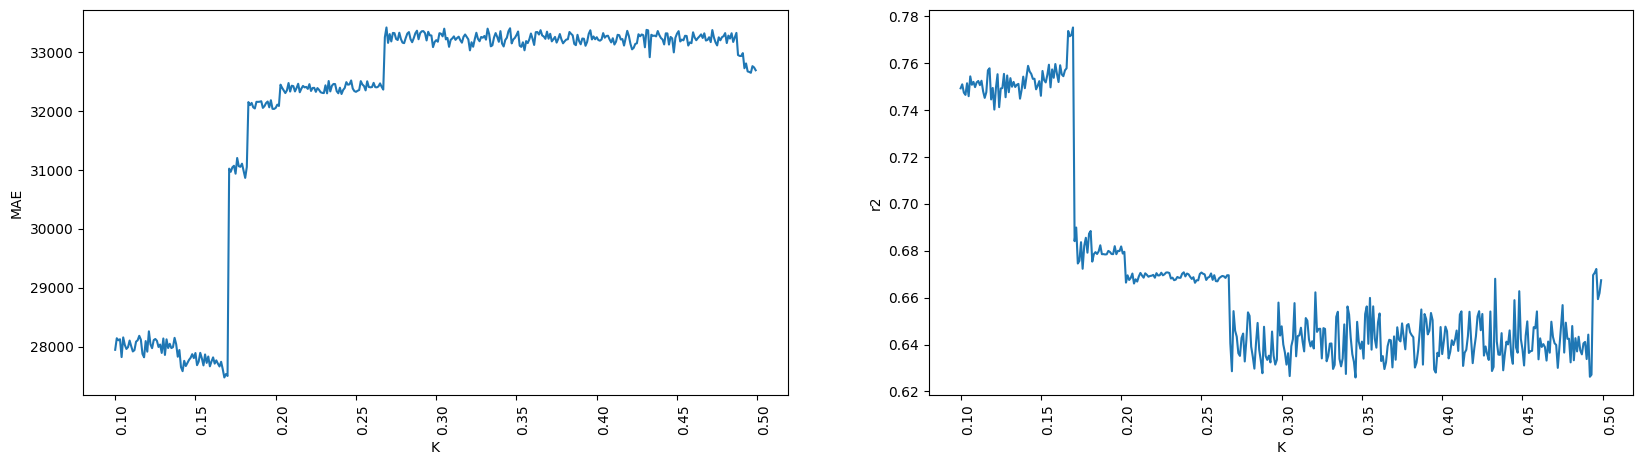

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


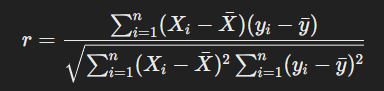

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.03043261754890978


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'BsmtQual_Ex', 'KitchenQual_Ex'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,35623.517190,50503.025149,0.667478
1,6,34510.193230,49856.803663,0.675933
2,7,31556.072606,45251.703334,0.733034
3,8,30228.639033,41954.273397,0.770523
4,9,29616.109307,40532.100026,0.785817
...,...,...,...,...
110,115,21927.576614,31579.892119,0.869981
111,116,21981.226884,31638.045713,0.869502
112,117,22035.271425,32040.731867,0.866158
113,118,21950.613130,31707.759002,0.868926


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
63,68,21399.936770,30635.422827,0.877642
50,55,21421.643885,30996.837188,0.874738
52,57,21455.590448,31160.594129,0.873411
53,58,21469.857027,31080.860602,0.874058
57,62,21597.003936,31139.364257,0.873583
...,...,...,...,...
4,9,29616.109307,40532.100026,0.785817
3,8,30228.639033,41954.273397,0.770523
2,7,31556.072606,45251.703334,0.733034
1,6,34510.193230,49856.803663,0.675933


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


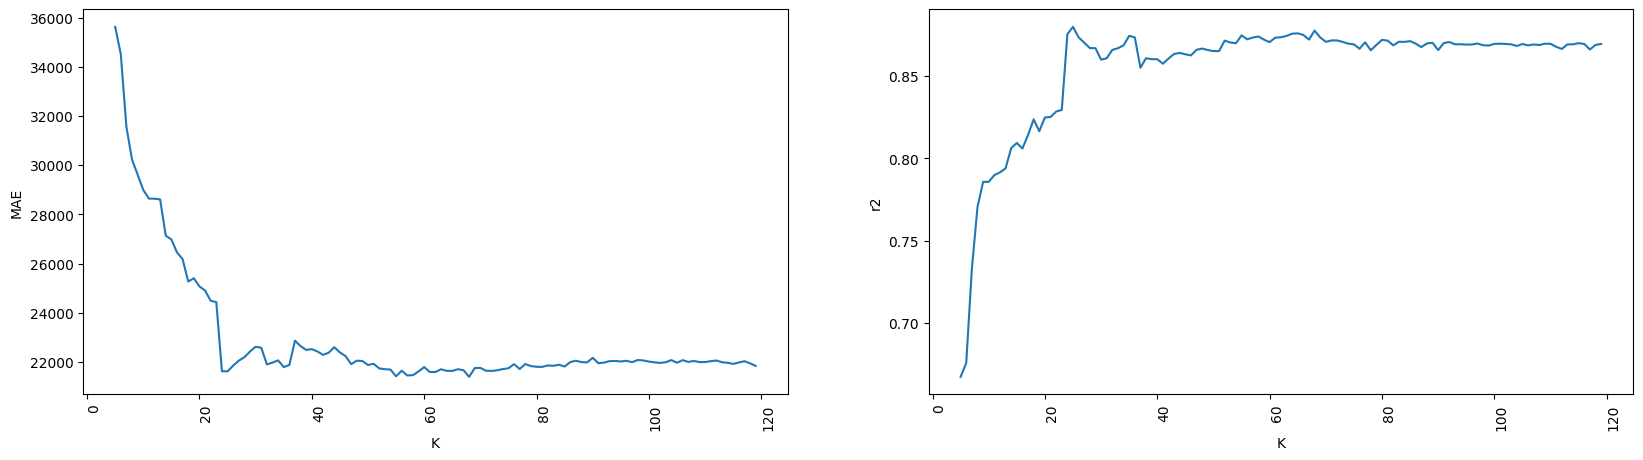

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

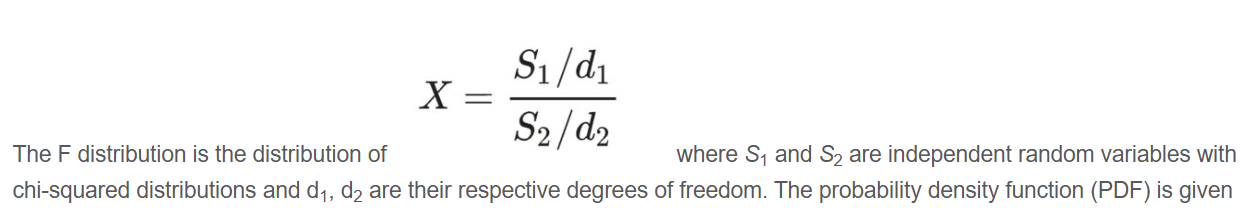

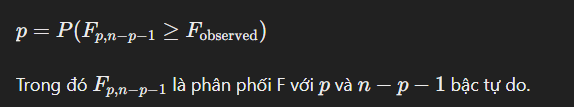

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,34481.936623,51430.721664,0.655149
1,6,33491.939915,49251.394253,0.683755
2,7,32180.136140,47699.863413,0.703366
3,8,31308.821328,46764.330262,0.714888
4,9,31210.924160,46441.628836,0.718809
...,...,...,...,...
110,115,19510.368815,30158.330364,0.881423
111,116,19915.044551,30728.641535,0.876896
112,117,19741.431310,30403.034067,0.879491
113,118,19434.132901,29830.632748,0.883986


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
81,86,19212.886575,29850.867276,0.883828
93,98,19228.390087,29308.996528,0.888008
95,100,19250.866569,29481.115897,0.886688
75,80,19281.662541,29384.272807,0.887432
76,81,19297.189899,29464.602210,0.886815
...,...,...,...,...
5,10,31212.808145,46477.660659,0.718373
3,8,31308.821328,46764.330262,0.714888
2,7,32180.136140,47699.863413,0.703366
1,6,33491.939915,49251.394253,0.683755


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


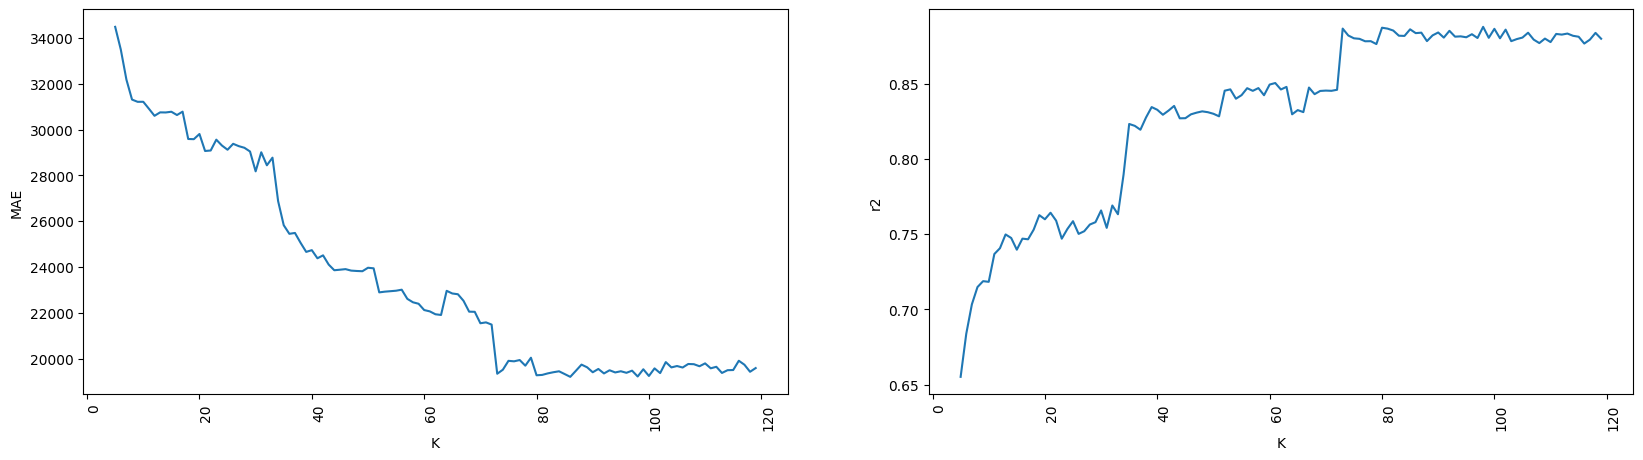

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

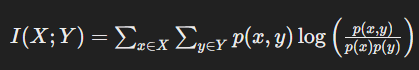

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

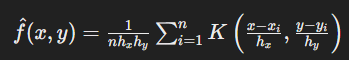

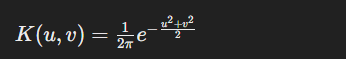

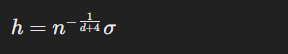

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,33332.856099,51888.461933,0.648983
1,6,33097.406735,51416.700051,0.655337
2,7,33011.860809,51384.485603,0.655769
3,8,32081.485736,49293.548255,0.683214
4,9,32076.172439,49282.872984,0.683351
...,...,...,...,...
110,115,19568.994614,29666.369658,0.885260
111,116,19729.548858,29904.754047,0.883409
112,117,20145.439507,32183.915587,0.864960
113,118,20089.347580,30292.674345,0.880364


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
96,101,19339.392602,31301.449006,0.872263
85,90,19348.479685,30909.240826,0.875445
86,91,19375.548159,31102.931437,0.873879
108,113,19416.548728,29485.128623,0.886658
110,115,19568.994614,29666.369658,0.885260
...,...,...,...,...
4,9,32076.172439,49282.872984,0.683351
3,8,32081.485736,49293.548255,0.683214
2,7,33011.860809,51384.485603,0.655769
1,6,33097.406735,51416.700051,0.655337


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26136\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


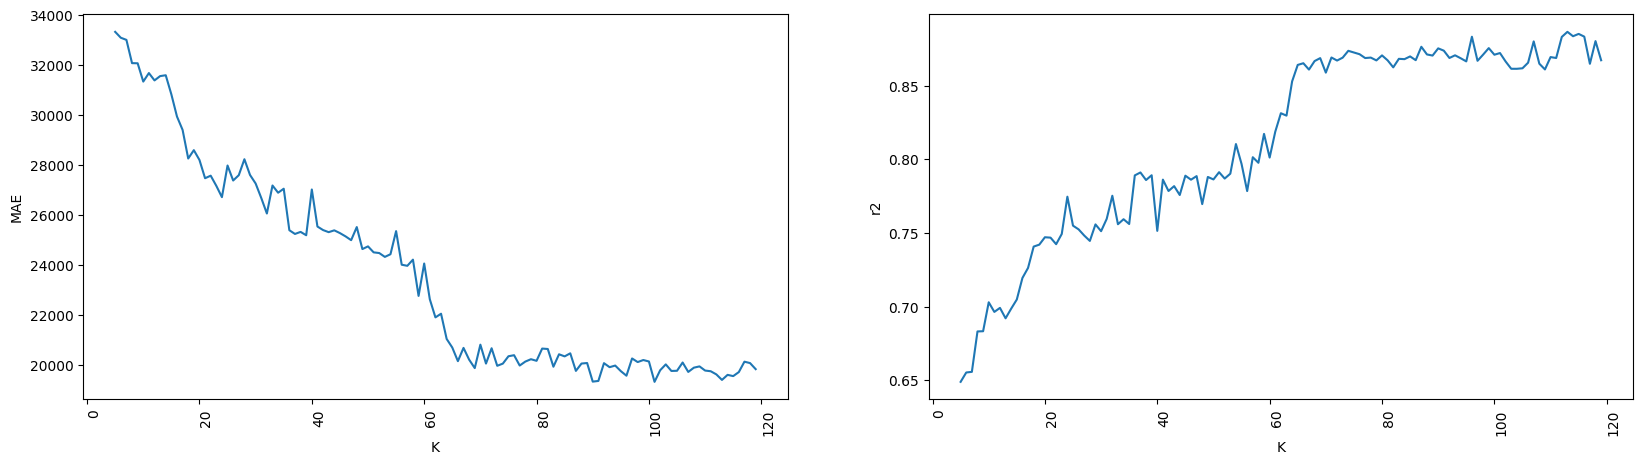

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,23715.753584,40892.911712,0.781987
1,6,24235.726550,41670.360568,0.773619
2,7,24460.617609,40265.764752,0.788623
3,8,24231.918387,37522.375475,0.816445
4,9,24556.118162,38254.117995,0.809216
...,...,...,...,...
110,115,16820.082283,27112.343068,0.904166
111,116,16951.380175,28106.883083,0.897006
112,117,16915.283277,27876.811266,0.898685
113,118,16808.431202,27083.615021,0.904369


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,23258.379035,35901.265726,0.831963
1,6,22662.693796,34237.464174,0.847177
2,7,22041.065371,33683.452102,0.852083
3,8,22522.751463,34629.766338,0.843655
4,9,22364.717873,33447.460213,0.854148
...,...,...,...,...
110,115,16906.661179,27759.384436,0.899537
111,116,16874.800048,27583.651259,0.900805
112,117,16965.521153,28171.318218,0.896533
113,118,16848.369399,27409.171405,0.902056


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,33332.856099,51888.461933,0.648983
1,6,33097.406735,51416.700051,0.655337
2,7,33011.860809,51384.485603,0.655769
3,8,32081.485736,49293.548255,0.683214
4,9,32076.172439,49282.872984,0.683351
...,...,...,...,...
110,115,19568.994614,29666.369658,0.885260
111,116,19729.548858,29904.754047,0.883409
112,117,20145.439507,32183.915587,0.864960
113,118,20089.347580,30292.674345,0.880364


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,23715.753584,40892.911712,0.781987,23258.379035,35901.265726,0.831963
1,6,24235.726550,41670.360568,0.773619,22662.693796,34237.464174,0.847177
2,7,24460.617609,40265.764752,0.788623,22041.065371,33683.452102,0.852083
3,8,24231.918387,37522.375475,0.816445,22522.751463,34629.766338,0.843655
4,9,24556.118162,38254.117995,0.809216,22364.717873,33447.460213,0.854148
...,...,...,...,...,...,...,...
110,115,16820.082283,27112.343068,0.904166,16906.661179,27759.384436,0.899537
111,116,16951.380175,28106.883083,0.897006,16874.800048,27583.651259,0.900805
112,117,16915.283277,27876.811266,0.898685,16965.521153,28171.318218,0.896533
113,118,16808.431202,27083.615021,0.904369,16848.369399,27409.171405,0.902056


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,23715.753584,40892.911712,0.781987,23258.379035,35901.265726,0.831963,33332.856099,51888.461933,0.648983
1,6,24235.726550,41670.360568,0.773619,22662.693796,34237.464174,0.847177,33097.406735,51416.700051,0.655337
2,7,24460.617609,40265.764752,0.788623,22041.065371,33683.452102,0.852083,33011.860809,51384.485603,0.655769
3,8,24231.918387,37522.375475,0.816445,22522.751463,34629.766338,0.843655,32081.485736,49293.548255,0.683214
4,9,24556.118162,38254.117995,0.809216,22364.717873,33447.460213,0.854148,32076.172439,49282.872984,0.683351
...,...,...,...,...,...,...,...,...,...,...
110,115,16820.082283,27112.343068,0.904166,16906.661179,27759.384436,0.899537,19568.994614,29666.369658,0.885260
111,116,16951.380175,28106.883083,0.897006,16874.800048,27583.651259,0.900805,19729.548858,29904.754047,0.883409
112,117,16915.283277,27876.811266,0.898685,16965.521153,28171.318218,0.896533,20145.439507,32183.915587,0.864960
113,118,16808.431202,27083.615021,0.904369,16848.369399,27409.171405,0.902056,20089.347580,30292.674345,0.880364


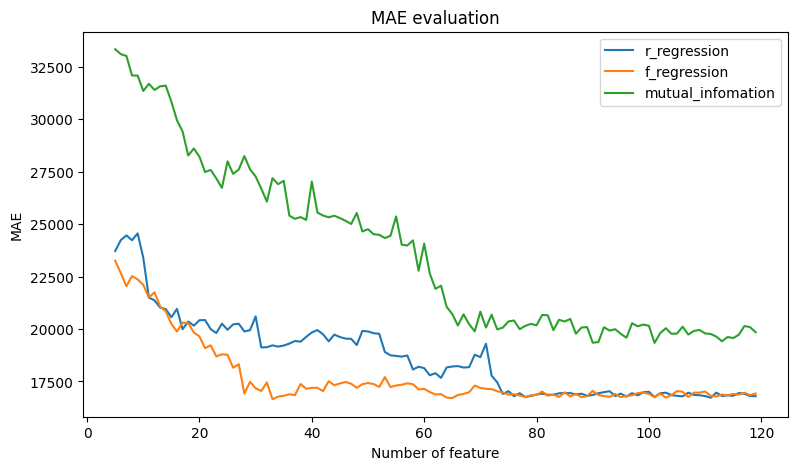

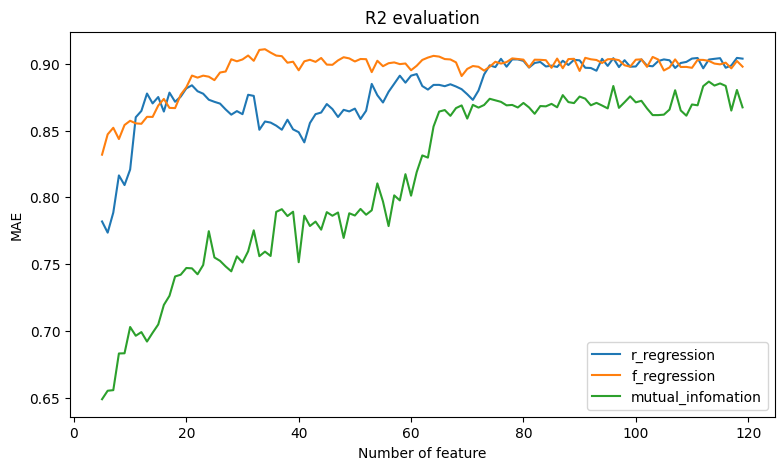

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()